In [43]:
import os

import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

from dotenv import load_dotenv

In [44]:
load_dotenv()

DSN = os.environ["DSN"]
query = "SELECT id, post_text, likes, reposts, replies, creation_date FROM posts LIMIT 1000;"

with psycopg2.connect(dsn=DSN) as conn:
    df = pd.read_sql_query(query, conn)

/tmp/ipykernel_393352/2554699802.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [45]:
df

,id,post_text,likes,reposts,replies,creation_date
0,113857116488240121,The Official Melania Meme is live!\nYou can bu...,24600,4700,1290,2025-01-20 00:10:00
1,113856690230367605,President Trump and Vice President-elect Vance...,18800,3510,293,2025-01-19 21:43:00
2,113855307173969680,We are truly blessed Mr.President 🤜🏻🤛🏻🇺🇸,13800,2200,278,2025-01-19 02:14:00
3,113857074105553053,https://rumble.com/v6b3hk4-president-trumps-ce...,15800,3650,783,2025-01-20 00:11:00
4,113855915580019275,14:24\n00:00\n/\n14:24,42700,9580,3240,2025-01-19 06:51:00
...,...,...,...,...,...,...
494,110600455076703891,And he did it all while battling a deep state ...,572,119,10,2023-06-24 20:50:00
495,110600448800327020,He achieved energy independence. Successfully ...,576,120,8,2023-06-24 20:48:00
496,108572854739975086,To report woke abuses and violations in our sc...,72,33,2,2022-07-01 18:44:00
497,110600406827059354,issued arguably the most important domestic re...,441,102,9,2023-06-24 20:37:00


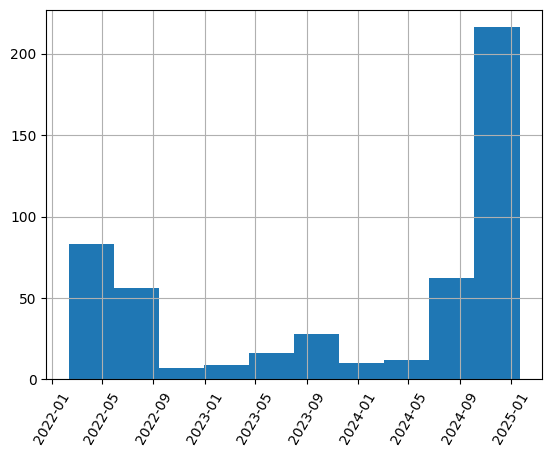

In [46]:
df['creation_date'].hist()
plt.xticks(rotation=60)
plt.show()

In [47]:
import string

text = ' '.join(df['post_text'])

translator = str.maketrans('', '', string.punctuation)
clean_text = text.translate(translator)

print(clean_text[:1500] + '...')

The Official Melania Meme is live
You can buy MELANIA now
Melaniamemecom
FUAfBo2jgks6gB4Z4LfZkqSZgzNucisEHqnNebaRxM1P President Trump and Vice Presidentelect Vance arrive at Arlington National Cemetery to lay wreaths at the Tomb of the Unknown Solider
0055
0000

0055 We are truly blessed MrPresident 🤜🏻🤛🏻🇺🇸 httpsrumblecomv6b3hk4presidenttrumpscelebratoryvictoryrallyhtml
President Trump’s Celebratory Victory Rally 1424
0000

1424 0207
0000

0207 Elon Musk is a great guy loaded with personality and “brainpower” He is definitely a high IQ person which is the reason that his really strong Endorsement meant so much to me and to MAGA He’s at a beautiful MaraLago concert right now and the crowd absolutely loves him Thank you Elon for the great job you did in helping us WIN the “most consequential election in 129 years” especially your hard work in the great Commonwealth of Pennsylvania It will never be forgotten MAKE AMERICA GREAT AGAIN President Trump delivers remarks during a candlelight din

In [48]:
clean_text = " ".join(filter(lambda s: s.isalpha(), clean_text.split()))
clean_text

'The Official Melania Meme is live You can buy MELANIA now Melaniamemecom President Trump and Vice Presidentelect Vance arrive at Arlington National Cemetery to lay wreaths at the Tomb of the Unknown Solider We are truly blessed MrPresident President Celebratory Victory Rally Elon Musk is a great guy loaded with personality and He is definitely a high IQ person which is the reason that his really strong Endorsement meant so much to me and to MAGA at a beautiful MaraLago concert right now and the crowd absolutely loves him Thank you Elon for the great job you did in helping us WIN the consequential election in especially your hard work in the great Commonwealth of Pennsylvania It will never be forgotten MAKE AMERICA GREAT AGAIN President Trump delivers remarks during a candlelight dinner at the National Building Museum in Washington DC My NEW Official Trump Meme is HERE time to celebrate everything we stand for WINNING Join my very special Trump Community GET YOUR TRUMP NOW Go to httpge

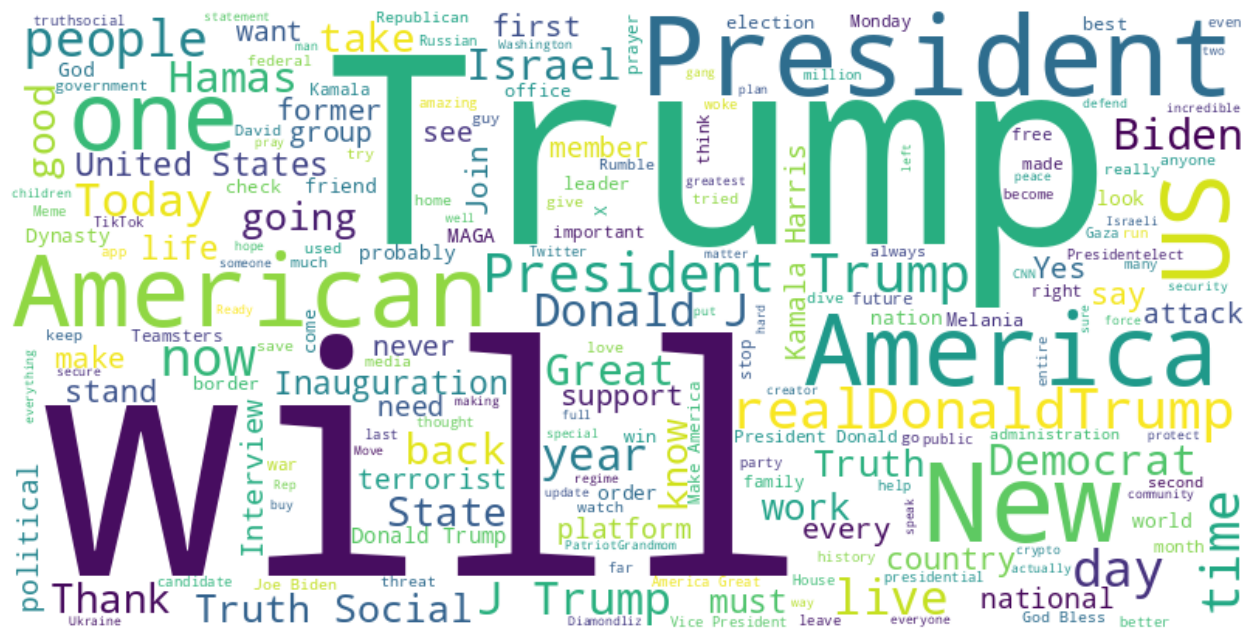

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

# Display the word cloud
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()
